# Schulungsnotebook - H2O AutoML
In diesem Notebook geht es um die Anwendung vom Supervised Learning mit der H2O AutoML Bibliothek. Dafür verwenden wir den Datensatz "Titanic_train.csv".
Eine Frage, die sich hier aufdrängt, lautet:  Ob eine Person, die an Bord der RMS Titanic war, eine Überlebenschance hatte oder nicht?

# 1 Vorverarbeitung

## 1.1 Importieren der notwendingen Pandas-Bibliothek

In [16]:
import pandas as pd
import numpy as np

## 1.2 Einlesen der CSV-Datei mit Pandas

In [5]:
df = pd.read_csv("Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Interpretation der Attribute

*   **PassengerID:** gibt die ID aller Passagiere an.
*   **Survived:** Enthält die Werte 0 und 1. Dabei steht 0 für nicht-überlebt und 1 für überlebt.
*   **PClass:** gibt die drei verschiedenen Passagierklassen an (1,2,3).
*   **Name:** Name des Passagiers.
*   **Sex:** Geschlecht der Passagiere.
*   **Age:** Alter der Passagiere.
*   **SibSp:** Angabe, dass der Passagier Geschwister und Ehepartner hat.
*   **Parch:** Ob ein Passagier allein oder mit der Familie unterwegs ist.
*   **Ticket:** gibt die Ticketnummer der Passagiere an.
*   **Fare:** Angabe des Fahrpreises.
*   **Cabine:** Kabine der Passagiere.
*   **Embarked:** Ort der Schiffsbesteigung (C = Cherbourg, Q = Queenstown, S = Southampton).


## 1.3 Behandlung von fehlenden Werten

Lassen Sie sich fehlende Werte anzeigen und führen Sie folgende Schritte der Datensäuberung durch:

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Aus dem obigen Ergebnis kann entnommen werden, dass Spalten 'Age', 'Cabin' und 'Embarked' viele fehlende Werte haben.

Im Folgenden sollen Sie bei der Spalte 'Age' diese durch den Mittelwert (mean), bei 'Embarked' durch den häufigsten Wert (mode()[0]) und bei 'Cabin' durch den Text 'Fehlender Wert' ersetzen.

In [23]:
dfCopy = df.copy()

In [24]:
dfCopy['Age'] = dfCopy['Age'].fillna(np.mean(dfCopy['Age']))
dfCopy['Embarked'] = dfCopy['Embarked'].fillna(df['Embarked'].mode()[0])
dfCopy['Cabin'] = dfCopy['Cabin'].fillna("Fehlender Wert")

In [25]:
dfCopy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Fehlender Wert,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Fehlender Wert,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Fehlender Wert,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Fehlender Wert,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Fehlender Wert,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


Überprüfen Sie, ob alle fehlenden Werte behandelt wurden.

In [26]:
dfCopy.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Es gibt Spalten, die in diesem Prozess nicht von großer Bedeutung sind. Lassen Sie uns die Spalten PassengerId, Name und Ticket entfernen. 

Es ist eine Datentransformation für die Spalten "Sex" und "Embarked" von kategorischen Werte in numerische Werte notwendig.

Ersetzen Sie dabei die Ausprägungen von Sex und Embarked durch numerische Werte (0,1,..).

In [28]:
dfFiltered = dfCopy.drop(['Sex', 'Embarked'], axis = 1)
dfFiltered

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,Fehlender Wert
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,Fehlender Wert
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,Fehlender Wert
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,Fehlender Wert
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,Fehlender Wert
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148


# 2 H2O AutoML

## 2.1 Installation der H2O AutoML Bibliothek

Installieren Sie die H2O-Bibliothek (Die Ausführung kann hier 2-3 Minuten dauern!) 

In [7]:
!pip install h2o

     |████████████████████████████████| 175.8 MB 12 kB/s s eta 0:00:01    |██████████▌                     | 57.4 MB 67.2 MB/s eta 0:00:02��██            | 110.2 MB 25.6 MB/s eta 0:00:03     |████████████████████▊           | 114.0 MB 25.6 MB/s eta 0:00:03
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832479 sha256=3b5dbda082becfde07b7d9c39f0cf9baf8cec751437af95896a150a5341e2bd0
  Stored in directory: /root/.cache/pip/wheels/01/74/09/0809b5c344d8a157cc8e5e56e5c071c7d157ac42bd0619a91e
Successfully built h2o


Importieren von notwendigen Bibliotheken

In [29]:
import h2o
from h2o.automl import H2OAutoML

Initialisieren des H2O Clusters.
Dies ist ein notwendiger Schritt, um die in H2O verwendeten Modelle entwickeln zu können.

In [31]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.20.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.20.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpanxhy8m2
  JVM stdout: /tmp/tmpanxhy8m2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpanxhy8m2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,2 months and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_k39zcy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1 Gb
H2O_cluster_total_cores:,6
H2O_cluster_allowed_cores:,6
H2O_cluster_status:,"locked, healthy"


## 2.2 Umwandlung des Pandas DataFrame in ein H2O DataFrame.

Wandeln Sie das Pandas DataFrame in ein H2O DataFrame um und benennen Sie das neue H2O DataFrame "titanic_h2o".

In [32]:
titanic_h2o = h2o.H2OFrame(dfFiltered)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


## 2.3 Erstellung der Modelle

Teilen Sie die Daten in Trainings- und Testdaten auf. 70% der Daten sollen Trainingsdaten sein und 30% Testdaten.


Ergänzt dabei die Parameter 'seed' mit dem Wert 200. Dies bewirkt, dass immer die gleiche Verteilung zwischen Trainings- und Testdaten ausgewählt wird und die Ergebnisse vergleichbar sind.

In [34]:
train,test = titanic_h2o.split_frame(ratios=[.7], seed=200)

In diesem Schritt werden die zu trainierenden Features und die Zielvariable "Survived" identifiziert. Anschließend wird die Zielvariablenspalte 'Survived' aus der Auflistung der Spalten entfernt.

In [35]:
features = train.columns
target = "Survived"
features.remove(target)

Nun wird die Zielvariable als Faktor, sowohl bei den Trainings- als auch bei den Testdaten gespeichert. Bei einer binären Klassifizierung sollte die Zielvariable ein Faktor sein.

In [36]:
train[target] = train[target].asfactor()
test[target] = test[target].asfactor()

Untersuchen Sie den folgenden Code. Was bewirkt dieser?
Die Ausführung kann etwas Zeit in Anspruch nehmen.

In [37]:
aml = H2OAutoML(exclude_algos = ["StackedEnsemble"] ,max_models=10, max_runtime_secs=3000, seed=1)
aml.train(x=features, y=target, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_1_20211208_122531


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,42.0,42.0,69314.0,15.0,20.0,18.642857,94.0,137.0,117.166664




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.19109197017651114
RMSE: 0.4371406754999026
LogLoss: 0.6738798921024469
Mean Per-Class Error: 0.30181887078438807
AUC: 0.7635412255087712
AUCPR: 0.7264496149370139
Gini: 0.5270824510175425

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3088235294117647: 


,,0,1,Error,Rate
0,0,229.0,148.0,0.3926,(148.0/377.0)
1,1,55.0,183.0,0.2311,(55.0/238.0)
2,Total,284.0,331.0,0.3301,(203.0/615.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.308824,0.643234,224.0
1,max f2,0.071429,0.765646,363.0
2,max f0point5,0.727273,0.684282,78.0
3,max accuracy,0.727273,0.738211,78.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.727273,0.436580,78.0
8,max min_per_class_accuracy,0.380191,0.673740,192.0
9,max mean_per_class_accuracy,0.550893,0.698181,134.0



Gains/Lift Table: Avg response rate: 38.70 %, avg score: 41.33 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.014634,0.999038,2.584034,2.584034,1.000000,0.999311,1.000000,0.999311,0.037815,0.037815,158.403361,158.403361,0.037815
1,2,0.021138,0.998300,2.584034,2.584034,1.000000,0.998565,1.000000,0.999082,0.016807,0.054622,158.403361,158.403361,0.054622
2,3,0.032520,0.997794,2.584034,2.584034,1.000000,0.997963,1.000000,0.998690,0.029412,0.084034,158.403361,158.403361,0.084034
3,4,0.040650,0.967721,2.584034,2.584034,1.000000,0.992518,1.000000,0.997456,0.021008,0.105042,158.403361,158.403361,0.105042
4,5,0.050407,0.943264,2.584034,2.584034,1.000000,0.949317,1.000000,0.988138,0.025210,0.130252,158.403361,158.403361,0.130252
5,6,0.104065,0.875000,2.192513,2.382156,0.848485,0.910300,0.921875,0.948003,0.117647,0.247899,119.251337,138.215599,0.234637
6,7,0.152846,0.800000,1.981092,2.254157,0.766667,0.835891,0.872340,0.912222,0.096639,0.344538,98.109244,125.415698,0.312708
7,8,0.203252,0.727273,1.583763,2.087899,0.612903,0.759949,0.808000,0.874459,0.079832,0.424370,58.376254,108.789916,0.360709
8,9,0.305691,0.583333,1.107443,1.759342,0.428571,0.645230,0.680851,0.797642,0.113445,0.537815,10.744298,75.934203,0.378664
9,10,0.400000,0.463590,0.980151,1.575630,0.379310,0.520752,0.609756,0.732359,0.092437,0.630252,-1.984932,57.563025,0.375610




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.2135440813143742
RMSE: 0.4621083004170929
LogLoss: 0.6959811953501706
Mean Per-Class Error: 0.3180627688741279
AUC: 0.7295934288834898
AUCPR: 0.619819281591084
Gini: 0.45918685776697954

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2616829738020897: 


,,0,1,Error,Rate
0,0,190.0,187.0,0.496,(187.0/377.0)
1,1,43.0,195.0,0.1807,(43.0/238.0)
2,Total,233.0,382.0,0.374,(230.0/615.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.261683,0.629032,249.0
1,max f2,0.035798,0.770227,384.0
2,max f0point5,0.632222,0.620950,93.0
3,max accuracy,0.632222,0.707317,93.0
4,max precision,0.941615,0.818182,13.0
5,max recall,0.035798,1.000000,384.0
6,max specificity,1.000000,0.997347,0.0
7,max absolute_mcc,0.515586,0.369010,131.0
8,max min_per_class_accuracy,0.400000,0.663130,183.0
9,max mean_per_class_accuracy,0.515586,0.681937,131.0



Gains/Lift Table: Avg response rate: 38.70 %, avg score: 42.72 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.014634,0.998065,2.009804,2.009804,0.777778,0.998867,0.777778,0.998867,0.029412,0.029412,100.980392,100.980392,0.024107
1,2,0.022764,0.980000,2.067227,2.030312,0.800000,0.980619,0.785714,0.992350,0.016807,0.046218,106.722689,103.031212,0.038261
2,3,0.030894,0.966186,1.550420,1.904025,0.600000,0.975466,0.736842,0.987907,0.012605,0.058824,55.042017,90.402477,0.045561
3,4,0.040650,0.958078,2.153361,1.963866,0.833333,0.959476,0.760000,0.981083,0.021008,0.079832,115.336134,96.386555,0.063917
4,5,0.050407,0.948317,2.584034,2.083898,1.000000,0.957458,0.806452,0.976511,0.025210,0.105042,158.403361,108.389808,0.089127
5,6,0.100813,0.899238,1.833830,1.958864,0.709677,0.926735,0.758065,0.951623,0.092437,0.197479,83.383031,95.886419,0.157691
6,7,0.151220,0.839806,1.333695,1.750474,0.516129,0.871243,0.677419,0.924829,0.067227,0.264706,33.369477,75.047438,0.185130
7,8,0.201626,0.760000,2.000542,1.812991,0.774194,0.801417,0.701613,0.893976,0.100840,0.365546,100.054215,81.299133,0.267403
8,9,0.300813,0.601863,1.355559,1.662162,0.524590,0.677147,0.643243,0.822481,0.134454,0.500000,35.555862,66.216216,0.324934
9,10,0.400000,0.467800,1.101391,1.523109,0.426230,0.529513,0.589431,0.749835,0.109244,0.609244,10.139138,52.310924,0.341339




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.656911,0.070032,0.756098,0.560976,0.650406,0.674797,0.642276
1,auc,0.730071,0.044443,0.766940,0.667878,0.733693,0.775741,0.706105
2,err,0.343089,0.070032,0.243902,0.439024,0.349594,0.325203,0.357724
3,err_count,42.200000,8.613942,30.000000,54.000000,43.000000,40.000000,44.000000
4,f0point5,0.581973,0.076455,0.672269,0.480000,0.603675,0.623377,0.530547
5,f1,0.647929,0.058561,0.680851,0.571429,0.681481,0.705882,0.600000
6,f2,0.736357,0.057654,0.689655,0.705882,0.782313,0.813559,0.690377
7,lift_top_group,1.803102,0.655255,2.673913,1.430233,2.320755,1.160377,1.430233
8,logloss,0.691699,0.141117,0.567076,0.710392,0.667525,0.591332,0.922172
9,max_per_class_error,0.466227,0.107310,0.304348,0.587500,0.514286,0.500000,0.425000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-12-08 12:25:42,2.002 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-12-08 12:25:42,2.074 sec,5.0,0.520801,6.891246,0.703704,0.567480,1.613063,0.359571
2,,2021-12-08 12:25:42,2.150 sec,10.0,0.477916,3.155731,0.726030,0.622140,1.862908,0.387889
3,,2021-12-08 12:25:43,2.226 sec,15.0,0.460088,1.921906,0.733388,0.649995,1.968788,0.308320
4,,2021-12-08 12:25:43,2.299 sec,20.0,0.449029,1.271383,0.747314,0.674232,1.987718,0.289431
5,,2021-12-08 12:25:43,2.377 sec,25.0,0.444997,0.956906,0.749788,0.699254,2.296919,0.354472
6,,2021-12-08 12:25:43,2.453 sec,30.0,0.443612,0.899320,0.754882,0.699139,2.280030,0.364228
7,,2021-12-08 12:25:43,2.538 sec,35.0,0.441879,0.789759,0.757902,0.719104,2.584034,0.346341
8,,2021-12-08 12:25:43,2.615 sec,40.0,0.436032,0.672021,0.766261,0.729339,2.584034,0.289431
9,,2021-12-08 12:25:43,2.651 sec,42.0,0.437141,0.673880,0.763541,0.726450,2.584034,0.330081



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Cabin,896.495300,1.000000,0.233756
1,PassengerId,691.164124,0.770962,0.180217
2,Age,670.799316,0.748246,0.174907
3,Fare,579.674927,0.646601,0.151147
4,Ticket,419.536469,0.467974,0.109392
5,Pclass,291.975555,0.325686,0.076131
6,SibSp,156.671555,0.174760,0.040851
7,Parch,128.854553,0.143731,0.033598


Geben Sie das Leaderboard aus und untersuchen Sie die Rangfolge der Modelle.

In [38]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_1_20211208_122531,0.729593,0.695981,0.619819,0.338347,0.462108,0.213544
XGBoost_2_AutoML_1_20211208_122531,0.727392,0.61274,0.626588,0.301891,0.454336,0.206422
XGBoost_3_AutoML_1_20211208_122531,0.721853,0.635181,0.624576,0.343769,0.461211,0.212716
GLM_1_AutoML_1_20211208_122531,0.721547,0.5949,0.616804,0.357795,0.450327,0.202795
XRT_1_AutoML_1_20211208_122531,0.720081,0.666999,0.618309,0.349169,0.483395,0.233671
XGBoost_1_AutoML_1_20211208_122531,0.713567,0.604305,0.600239,0.322465,0.454886,0.206922
GBM_2_AutoML_1_20211208_122531,0.713483,0.628631,0.619992,0.343111,0.462055,0.213495
GBM_3_AutoML_1_20211208_122531,0.712547,0.620669,0.608271,0.330072,0.460243,0.211823
GBM_1_AutoML_1_20211208_122531,0.708273,0.604221,0.58178,0.367173,0.456564,0.20845
GBM_4_AutoML_1_20211208_122531,0.699496,0.647608,0.58695,0.346432,0.468494,0.219486


## 2.4 Wenden Sie das beste Modell auf die Testdaten an.

Die Verwendung der Funktion predict() mit AutoML erzeugt Vorhersagen für das führende Modell des Laufes. Die Reihenfolge der Zeilen in den Ergebnissen entspricht der Reihenfolge, in der die Daten geladen wurden, auch wenn einige Zeilen fehlschlagen (z. B. aufgrund fehlender Werte oder nicht gesehener Faktorstufen).

Spalte predict: wirkliche Spalte aus den Testdaten, die vorher gesagt werden soll

P0: vorhergesagte Wahrscheinlichkeit, dass eine 0 herauskommt

P1: vorhergesagte Wahrscheinlichkeit, dass eine 1 herauskommt

Nur die ersten 10 Zeilen werden ausgegeben. Wenn mehr Zeilen ausgegeben werden sollen, muss dies mit der Funktion .head() erfolgen.


In [40]:
prediction = aml.predict(test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [43]:
prediction.head(20)

predict,p0,p1
0,0.759144,0.240856
1,0.239583,0.760417
1,0.345238,0.654762
1,0.541667,0.458333
1,0.535714,0.464286
1,0.285714,0.714286
1,0.283333,0.716667
1,0.411922,0.588078
1,0.597222,0.402778
1,0.422619,0.577381


## 2.5 Ergebnisse auswerten

Speichen Sie das beste Modell in die Variable m. Hinweis: Geben Sie den Namen des besten Modells mit dem Befehl '.algo' aus.

Verwenden Sie darauffolgend diese Variable m, um sich mittels der explain-Funktion Informationen über das Modell ausgeben zu lassen. Ergänzt dabei exclude_explanations=["PDP", "shap_summary"], da diese Visualisierungen für unsere Auswertungen nicht relevant sind.


Bewerten sie die Confusion-Matrix des besten Modells auf Basis der Testdaten.

----------------------------------------------

Als kleine Hilfestellung zur Confusion-Matrix:

Zeilen: tätsachliche Ereignisse

Spalten: vorhergesagte Ereinisse

Rate: Fehlerrate der Vorhersagen anhand der wirklichen Ereignisse

Was können Sie über die Variablen-Wichtigkeit sagen?

In welchem Zusammenhang steht die Variablenwichtigkeit und die damaligen Werte in Bezug auf das Szenario der Titanic.

In [47]:
m = aml.leader
m.algo

'drf'

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_1_20211208_122531


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33786847974572864: 


,,0,1,Error,Rate
0,0,114.0,58.0,0.3372,(58.0/172.0)
1,1,22.0,82.0,0.2115,(22.0/104.0)
2,Total,136.0,140.0,0.2899,(80.0/276.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

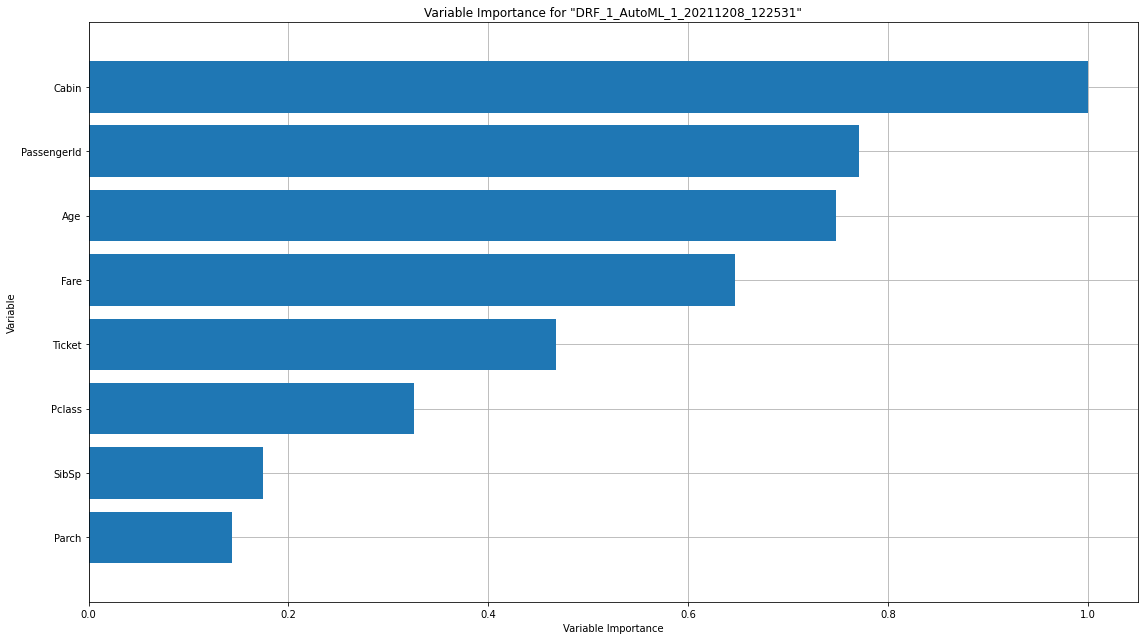

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_1_20211208_122531


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33786847974572864: 


,,0,1,Error,Rate
0,0,114.0,58.0,0.3372,(58.0/172.0)
1,1,22.0,82.0,0.2115,(22.0/104.0)
2,Total,136.0,140.0,0.2899,(80.0/276.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

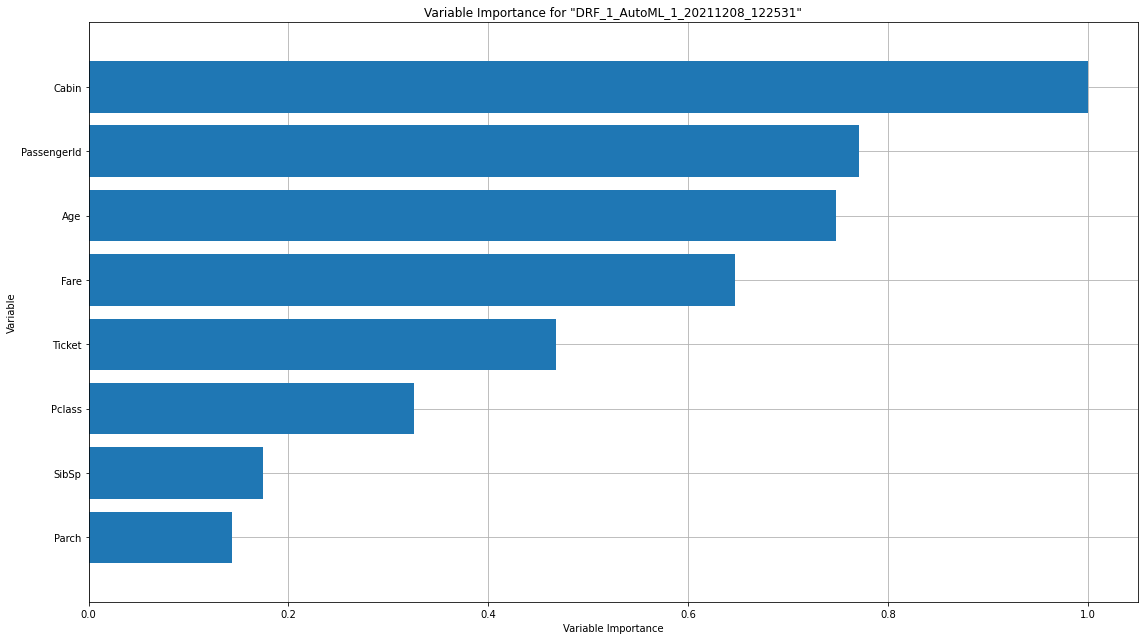

In [48]:
m.explain(test, exclude_explanations=["PDP", "shap_summary"])
